##*Elizabeth Torres Torrecillas* 

# *Actividad 10*



---



---



---



In [25]:
#Importar bibliotecas a utilizar 
import numpy as np
from scipy.integrate import odeint
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable



---



* Ejercicio 1

Resuelva la Ecuación del calor, usando el método anterior para el siguiente caso:







**Caso a)** 

Una barra metálica de longitud 
$L=10$,

 coeficiente de difusión $\kappa=100$.


Condición inicial (Temperatura dentro de la barra): $ u(x,0) = 0$

Condiciones a la frontera:

 $u(0,t)=10$;              
 
 $ u(L,t)=0.$

Realice los cálculos hasta alcanzar el equilibrio térmico.

`Resolvemos la ecuación de calor a partir del método de diferencias finitas`

Tal que:
$$ \frac{u(x,t+k)-u(x,t)}{k}= \kappa \frac{u(x+h,t)-2u(x,t)+u(x-h,t)}{h^2}+O(h^3,k^2) $$

Siendo:
 $k=\Delta t;\; h=\Delta x$


Por lo cual lo podemos representar como:

$$ u(x,t+k) = \kappa \frac{k}{h^2}(u(x+h,t)-2u(x,t)+u(x-h,t))+u(x,t)$$

Realizamos un cambio de variable, tal que:
$$\begin{align*}
 V_{t+k}=u(x,t+k)\\
  V_{t}=u(x,t)\\
V_{x+h}=u(x+h,t)\\
V_{x}=u(x,t)\\
V_{x-h}=u(x-h,t)\\
f=\kappa \frac{k}{h^2}\\
\end{align*}$$

Para visualizar de una manera más sencilla, lo reescribimos como:

$$ V_{t+k} = f(V_{x+h}-2V_{x}+V_{x-h})+V_{x}$$

Notamos que el método es estable y convergente si

El método es estable y convergente solo si $f \leq\frac{1}{2}$


* Solución con ayuda de la función ODEINT

In [26]:
##Esta solución será con ayuda de la función ODEINT
#Definimos la función
#Diferencias finitas centradas de segundo orden
def f(u,t):
#Longitud de la barra va de 0 a 10
#Comienza en 0
    du = np.zeros(x0.shape)
#Condiciones de frontera 
#u(0,t)=10
    du[0] = 10
#u(L,t)=0
    du[-1] =0
#Coeficiente de difusión
    kappa = 100
    #Hacemos un for para poder calcular la temperatura en los puntos interiores 1 a N-1
    for m in range(1, M-1):
      #Lado derecho de la ecuación
          du[m] = kappa*(u[m + 1] - 2*u[m] + u[m - 1]) / h**2
    return du

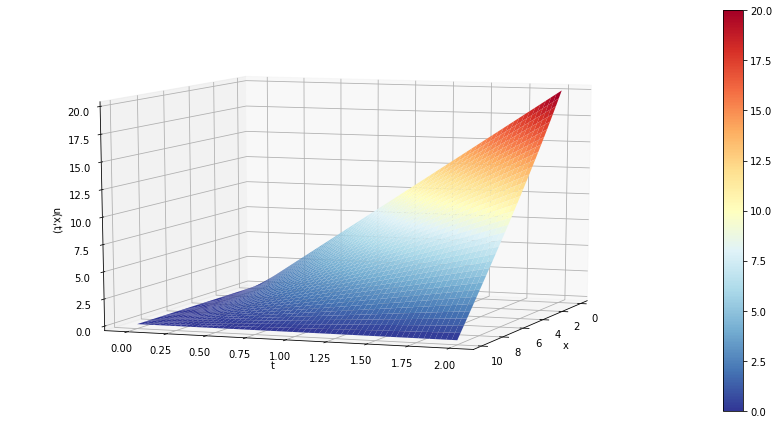

In [27]:
#Parámetros 
#Longitud de la barra 
a = 0
b = 10

#Tiempo inicial y final de integración 
t0 = 0
tf = 2

#Número de puntos en la dirección x
M=35

#Tamaño de delta x
h = (b-a)/(M-1)

#Los puntos en el dominio x
x = np.linspace(a, b, M);

#Condición inicial u(x,0)=sin(pi*x)
x0 = np.zeros(x.shape)

#Puntos de integración en el tiempo
t = np.linspace(t0, tf, 60);

#Obtenemos la solución usando scipy.integrate.odeint
sol = odeint(f, x0, t)

#Tamaño de figura
fig = plt.figure(figsize=(12,6))

#Graficación en el espacio 3D
ax = fig.add_subplot(111, projection='3d')

#Graficación de la solución
#Malla a graficar
X, T = np.meshgrid(x,t)
ax.plot_surface(X, T, sol, cmap='RdYlBu_r', rstride=1, cstride=1)

#Escala de temperaturas
m=cm.ScalarMappable(cmap='RdYlBu_r')
m.set_array(sol)
plt.colorbar(m)

#Etiquetas
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')

#Lado de observación
ax.view_init(elev=10, azim=20)

plt.tight_layout()
plt.show()


* Solución a partir del método de diferencias finitas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: UserWarning: The following kwargs were not used by contour: 'lw'


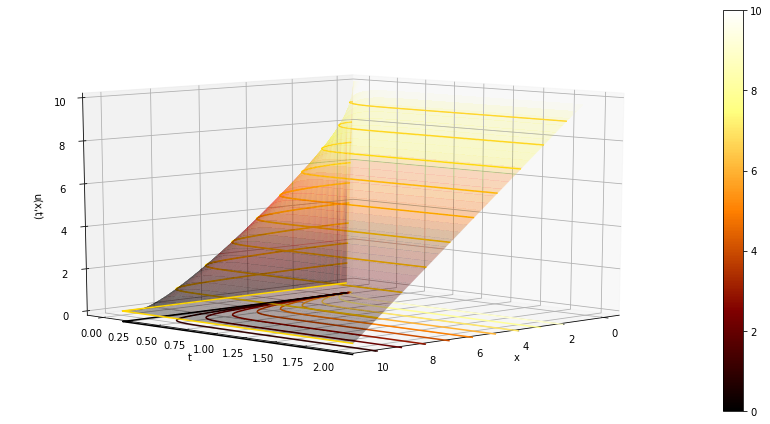

In [28]:
#Problema de valores iniciales y condiciones de la frontera
#Solución por el método de diferencias finitas
#Definimos parámetros

#x=L
#Límite inferior
a=0.0
#Límite superior
b=10.0

#Intervalo de tiempo
#Tiempo inicial
t0=0.0
#Tiempo final
tf=2.0

#Número de pasos en la dirección x
#Espaciales
M=35
#Temporales
N=5000

#Matriz de valores 
#Espacial
x=np.linspace(a,b,M)
#Temporal
t=np.linspace(t0,tf,N)

#Cambio en la dirección x
h=(b-a)/(M-1)
#Intervalo de t
k=(tf-t0)/(N-1)

#Coeficiente de difusión
kappa=100

#Declaramos f
#Siendo lo del cambio de variable realizado
f=kappa*k/h**2

#Matriz temperatura, espacial y temporal
u=np.zeros((M,N))

#Definimos valores
#Condiciones de frontera
u[:,0]=np.zeros(x.shape)
#u(0,t)=10
u[0,:]=10
#u(L,t)=0
u[-1,:]=0

#Método de diferencias finitas
for n in range(0,N-1):
#Calculamos la temperatura sobre todo el dominio de x
  for m in range(1,M-1):
      u[m,n+1]=f*u[m+1,n]+(1-2*f)*u[m,n]+f*u[m-1,n]

#Graficación de la solución
#Malla a graficar
T, X = np.meshgrid(t,x)

#Tamaño de figura
fig=plt.figure(figsize=(12,6))

#Graficación en el espacio 3D
ax = fig.gca(projection='3d')
ax.plot_surface(X,T,u,cmap='afmhot',rstride=1,cstride=1,alpha=0.3)

#Contornos
ax.contour(X,T,u,10,lw=1,colors='gold',linestyles='solid')
ax.contour(X,T,u,10,lw=1,cmap='afmhot',linestyles='solid',offset=-0.5)

#Escala de temperaturas
m=cm.ScalarMappable(cmap='afmhot')
m.set_array(u)
plt.colorbar(m)

#Etiquetas
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')

#Lado de observación
ax.view_init(elev=10,azim=45)

plt.tight_layout()
plt.show()

**Caso b)** 

Un material de 

longitud $$L=10$$

coeficiente de difusión térmica $$\kappa=0.25$$

Condición inicial 

$$u(x,0)=20$$

Condiciones a la frontera: 

$$u(0,t)=(20 + 10 sin(\pi*t/12)$$  

$$u(L,t)=20$$

Realice los cálculos para $$t=(0,48)$$

Pueden ajustar los parámetros para ver cómo cambia la temperatura dentro del cuerpo.

Siendo k/h^2 < 1/2 0.11099819963992798 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: UserWarning: The following kwargs were not used by contour: 'lw'


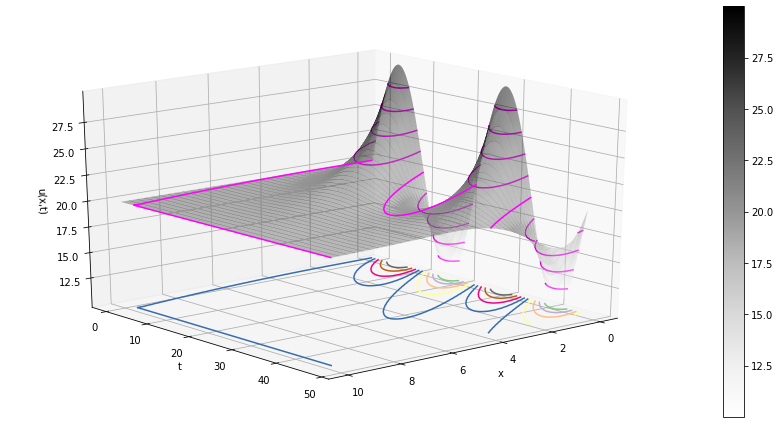

In [29]:
#Problema de valores iniciales y condiciones de la frontera
#Solución por el método de diferencias finitas
#Definimos parámetros

#x=L
#Límite inferior
a=0.0  
#Límite superior
b=10.0

#Intervalo de tiempo
#Tiempo inicial
t0=0.0
#Tiempo final
tf=48.0

#Número de pasos en la dirección x
#Espaciales
M=35   
#Temporal
N=5000 

#Matriz de valores 
#Espacial
x=np.linspace(a,b,M)
#Intervalo de t
t=np.linspace(t0,tf,N)

#Cambio en la dirección x
h=(b-a)/(M-1)
#Intervalo de t
k=(tf-t0)/(N-1)

#Del criterio de convergencia
print('Siendo k/h^2 < 1/2', k/h**2,'\n')

#Coeficiente de difusión
kappa=0.25

#Declaramos f
#Siendo lo del cambio de variable realizado
f=kappa*k/h**2

#Matriz temperatura, espacial y temporal
u=np.zeros((M,N))

#Definimos valores
#Condiciones de frontera
u[:,0]=np.zeros(x.shape)+20
#u(0,t)=20+10sen(π t/12)
u[0,:]=20+10*np.sin(np.pi*t/12)
#u(L,t)=20
u[-1,:]=20

#Método de diferencias finitas
for n in range(0,N-1):
#Calculamos la temperatura sobre todo el dominio de x
  for m in range(1,M-1):
      u[m,n+1]=f*u[m+1,n]+(1-2*f)*u[m,n]+f*u[m-1,n]

#Graficación de la solución
#Malla a graficar
T, X = np.meshgrid(t,x)

#Tamaño de figura
fig=plt.figure(figsize=(12,6))

#Graficación en el espacio 3D
ax = fig.gca(projection='3d')
ax.plot_surface(X,T,u,cmap='Greys',rstride=1, cstride=1, alpha=0.5)

#Contornos
ax.contour(X,T,u,10,lw=1,colors='fuchsia',linestyles='solid')
ax.contour(X,T,u,10,lw=1,cmap='Accent',linestyles='solid',offset=10)

#Escala de temperaturas
m=cm.ScalarMappable(cmap='Greys')
m.set_array(u)
plt.colorbar(m)

#Etiquetas
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')


#Lado de observación
ax.view_init(elev=20,azim=50)


plt.tight_layout()
plt.show()



---



* Ejercicio 2


**Problema 2:**

**Variaciones de la Temperatura en el Suelo**

La superficie de la Tierra recibe radiación solar durante el día. Esta Energía la transforma en calor, y cambia la temperatura dentro del suelo. Por la noche al no recibir radiación solar la emite a la atmósfera. 

Si suponemos que la temperatura del suelo varía con la profundidad, podemos suponer que tenemos un problema unidimensional, siendo el eje $x$ la dirección hacia dentro del suelo.

A cierta profundidad $x=L$, suponemos que la temperatura ya no cambia, es decir $\partial u/\partial x = 0$ (Condición de Neumann).

Supondremos que la variación de la temperatura en la superficie terrestre varía como 

\begin{equation*}
u(0,t) = u_0 + u_a \sin \frac{2\pi t}{P}
\end{equation*}

donde:

$$\frac{\partial u}{\partial x}(L,t)=0 $$


$$ u(L,t)= u_0$$


Siendo:

$u_0$ es la inical temperatura promedio del suelo

$u_a$ es la temperatura del aire

La constante $P$ es el periodo de variación diaria de temperatura 
$$P=24 h=86,400 s$$

En este caso la constante de difusión de calor

$$\kappa = 1.0 \times 10^{-6}$$ 

El tiempo será medido en segundos. 

Usando la Ecuación de Calor, determina numéricamente  la variación del perfil de temperatura dentro del suelo, por ejemplo para Hermosillo en estos días supongamos que:
$$u_0=15ºC$$
$$u_a= 20ºC$$

Realiza una simulación de al menos 48 horas. 





---



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


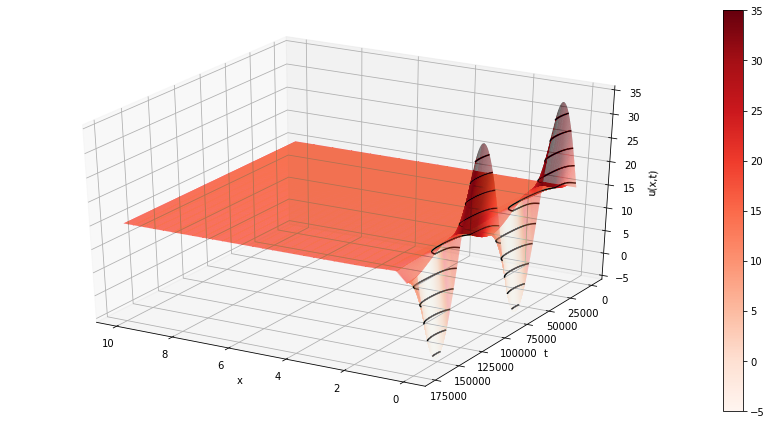

In [30]:
#Problema de valores iniciales y condiciones de la frontera
#Solución por el método de diferencias finitas
#Definimos parámetros
#x=L
#Límite inferior
x0=0.0
xf=10.0

#Intervalo de tiempo
#Tiempo inicial
t0=0.0
#Tiempo final
tf=172800.0

# Número de pasos de x y t
M = 30
N = 15001

# Distancia entre puntos de x y t
h=(xf-x0)/(M-1)
k=(tf-t0)/(N-1)

# Parámetros
kappa = 1e-6

#Temperatura inicial
Temp0=15.0
#Temperatura final
Temp1=20.0

#Periodo de variación diaria de temperatura
P=86400.0

#Declaramos f
#Siendo lo del cambio de variable realizado
f = kappa*k/h**2

#Matriz de valores 
#Espacial
x=np.linspace(x0,xf,M)
#Intervalo de t
t=np.linspace(t0,tf,N)

#Matriz temperatura, espacial y temporal
u=np.zeros((M,N))

# Condiciones de la forntera y valores iniciales
u[0,:]=Temp0+Temp1*np.sin(2*np.pi*t/P)
u[-1,:]=Temp0*np.ones(t.shape)
u[:,0]=Temp0

#Método de diferencias finitas
for i in range(0,N-1):
#Calculamos la temperatura sobre todo el dominio de x
  for j in range(1,M-1):
    u[j,i+1]=f*u[j+1,i]+(1-2*f)*u[j,i]+f*u[j-1,i]

#Graficación de la solución
#Malla a graficar
T, X = np.meshgrid(t,x)

#Tamaño de figura
fig=plt.figure(figsize=(12,6))

#Graficación en el espacio 3D
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X,T,u,cmap='Reds',rstride=1, cstride=1, alpha=0.5)

#Contornos
ax.contour(X,T,u,10,lw=1,colors='k',linestyles='solid')

#Escala de temperaturas
m=cm.ScalarMappable(cmap='Reds')
m.set_array(u)
plt.colorbar(m)

#Etiquetas
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')

#Lado de observación
ax.view_init(elev=30,azim=120)

plt.tight_layout()
plt.show()